In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("bank-additional-full.csv",sep=";")
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Observation
1.Total of 21 columns
   * 10 numerical columns
   * 11 categorical columns

2.Total of 41188 rows

In [5]:
#The duration column had to be dropped as adviced in the data description
data_df.drop('duration',axis=1,inplace=True)

#for the pdays column,we set the 999 to 0 to indicate no previous contact
data_df.pdays = data_df.pdays.replace({999: 0})

In [6]:
#Splitting the features into numerical and categorical columns
#This will help in the exploratory analysis

numeric_col = data_df[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
categorical_col = data_df.drop(numeric_col,axis=1)

In [7]:
numeric_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [8]:
categorical_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


## Statistical Analysis of our data

In [9]:
stats_df = pd.DataFrame(columns=['Mean','Mode','Median'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].mean(),data_df[column].mode().values[0],
                                data_df[column].median()]
stats_df

,Mean,Mode,Median
age,40.024060,31.000,38.000
campaign,2.567593,1.000,2.000
pdays,0.221229,0.000,0.000
previous,0.172963,0.000,0.000
emp.var.rate,0.081886,1.400,1.100
cons.price.idx,93.575664,93.994,93.749
cons.conf.idx,-40.502600,-36.400,-41.800
euribor3m,3.621291,4.857,4.857
nr.employed,5167.035911,5228.100,5191.000


In [10]:
stats_df = pd.DataFrame(columns=['Min','25th_percentile','Mean','75th_percentile','Max'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].min(),data_df[column].quantile(0.25),data_df[column].mean(),data_df[column].quantile(0.75),data_df[column].max()]
stats_df    

,Min,25th_percentile,Mean,75th_percentile,Max
age,17.000,32.000,40.024060,47.000,98.000
campaign,1.000,1.000,2.567593,3.000,56.000
pdays,0.000,0.000,0.221229,0.000,27.000
previous,0.000,0.000,0.172963,0.000,7.000
emp.var.rate,-3.400,-1.800,0.081886,1.400,1.400
cons.price.idx,92.201,93.075,93.575664,93.994,94.767
cons.conf.idx,-50.800,-42.700,-40.502600,-36.400,-26.900
euribor3m,0.634,1.344,3.621291,4.961,5.045
nr.employed,4963.600,5099.100,5167.035911,5228.100,5228.100


### Observation
* The youngest person is 17 years while the oldest is 98 years
* The average age is 40 years
* the call duration in average was 258 seconds
* The longest call lasted 4918 seconds while the lowest call lasted 0 seconds,does this mean
  no contact?
* During the campaign clients were contacted atleast once,while the most a client was contacted is 56 times
* On average clients were contacted 2 times
* Before this campaign,most clients were never contacted,while the most times a client was contacted was 7 times


In [11]:
#checking for missing values in the numerical columns
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(numeric_col[column]):
        Q1 = numeric_col[column].quantile(0.25)
        Q3 = numeric_col[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        outliers_count_df.loc[column] = [((numeric_col[column]<lower_whisker) | (numeric_col[column] > upper_whisker)).sum(),numeric_col[column].skew()]
outliers_count_df

,Outlier_Count,skewness
age,469.0,0.784697
campaign,2406.0,4.762507
pdays,1500.0,7.939537
previous,5625.0,3.832042
emp.var.rate,0.0,-0.724096
cons.price.idx,0.0,-0.230888
cons.conf.idx,447.0,0.303180
euribor3m,0.0,-0.709188
nr.employed,0.0,-1.044262


### Observations
* We have columns with outliers,this columns seemed to be highly skewed depending on the outliers count

In [12]:
#selecting numerical columns with outliers
outlier_col = outliers_count_df[outliers_count_df['Outlier_Count']>=1]
outlier_col = outlier_col.T
outlier_col

,age,campaign,pdays,previous,cons.conf.idx
Outlier_Count,469.000000,2406.000000,1500.000000,5625.000000,447.00000
skewness,0.784697,4.762507,7.939537,3.832042,0.30318


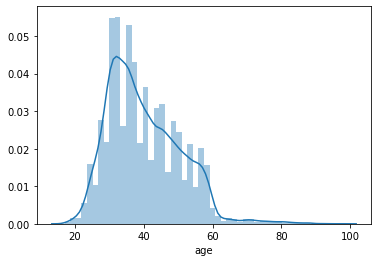

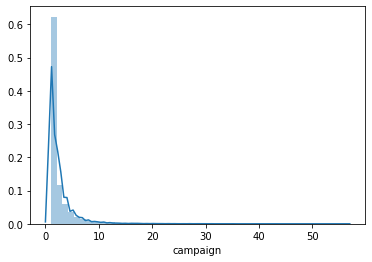

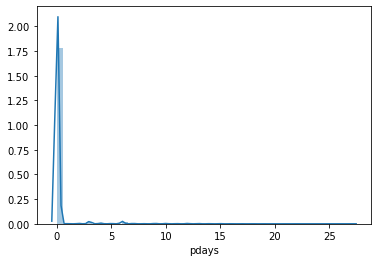

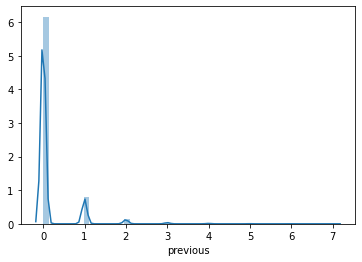

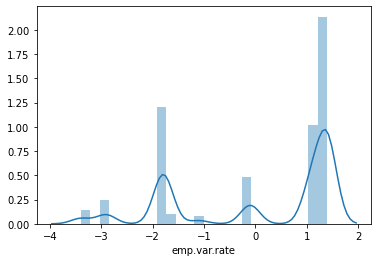

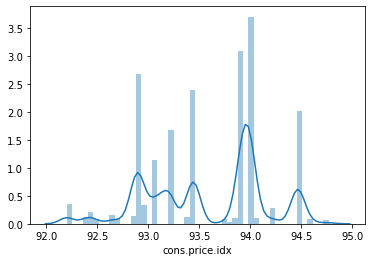

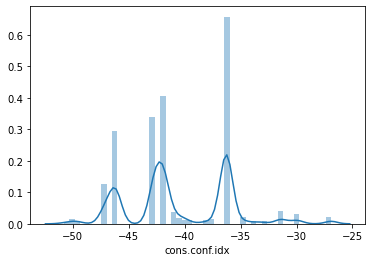

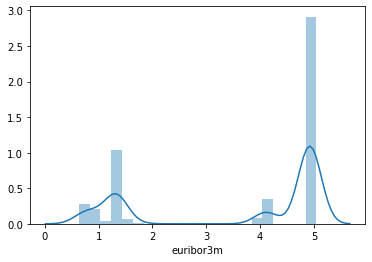

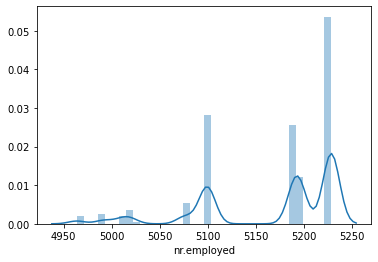

In [17]:
for i,col in enumerate(numeric_col):
    plt.figure(i)
    sns.distplot(numeric_col[col])

#### Age
* Majority of the populations is between age 20 and 60
* We have little data on ages 80 and above
* Most people are between age 30 and 40

#### duration
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

#### campaign
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

### pdays
* This column need to be processed so that we put the 999 value as 0,from the description this 
  shows the client was never contacted
* From the plot ,it seems most clients in this campaign were never contacted

#### previous
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

### For the remaing numerical columns,we need to further analyse them

## Summary for Numerical Columns
*# We have to deal with outliers in the select columns
*# We have to normalize the data
*# We have to scale the data as the columns have varying units of measurements

In [13]:
#Function to treat outliers
def outlier_treatment(datacolumn):
        sorted(datacolumn)
        Q1,Q3 = np.percentile(datacolumn , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 -(1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        return lower_range,upper_range

In [14]:
for i in outlier_col.columns:
    lower_range,upper_range = outlier_treatment(data_df[i])
    data_df.drop(data_df[ (data_df[i] > upper_range) | (data_df[i] < lower_range) ].index , inplace=True)

In [15]:
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in data_df[outlier_col.columns]:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        Q1 = data_df[column].quantile(0.25)
        Q3 = data_df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        outliers_count_df.loc[column] = [((data_df[column]<lower_whisker) | (data_df[column] > upper_whisker)).sum(),numeric_col[column].skew()]
outliers_count_df

,Outlier_Count,skewness
age,0.0,0.784697
campaign,0.0,4.762507
pdays,0.0,7.939537
previous,0.0,3.832042
cons.conf.idx,0.0,0.303180


In [23]:
#standardizing with sklearn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

for i in numeric_col:
    data_df[i] = scale.fit_transform(data_df[[i]])
data_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3.276500e+04,3.276500e+04,32765.0,32765.0,32765.000000,32765.000000,3.276500e+04,32765.000000,32765.000000
mean,-6.939529e-18,1.040929e-17,0.0,0.0,0.000000,0.000000,2.775812e-17,0.000000,0.000000
std,1.000015e+00,1.000015e+00,0.0,0.0,1.000015,1.000015,1.000015e+00,1.000015,1.000015
min,-2.283344e+00,-8.343910e-01,0.0,0.0,-2.673646,-2.690222,-2.490007e+00,-2.140839,-3.589122
25%,-8.063664e-01,-8.343910e-01,0.0,0.0,-0.344246,-0.832085,-5.430842e-01,0.033994,0.150490
50%,-1.733760e-01,-6.504187e-02,0.0,0.0,0.502808,0.503393,-3.267594e-01,0.572083,0.229426
75%,7.761094e-01,7.043072e-01,0.0,0.0,0.714572,0.644753,9.711891e-01,0.638221,0.760602
max,3.097074e+00,3.012354e+00,0.0,0.0,0.714572,2.082531,2.557571e+00,0.691516,0.760602


/home/gtechzilla/anaconda3/envs/week_6/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/gtechzilla/anaconda3/envs/week_6/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


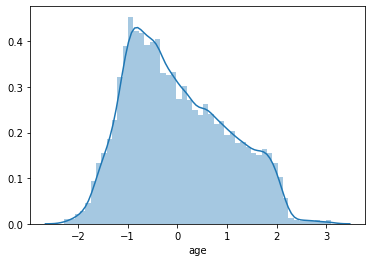

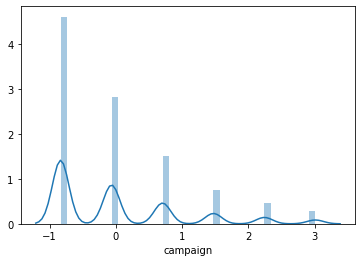

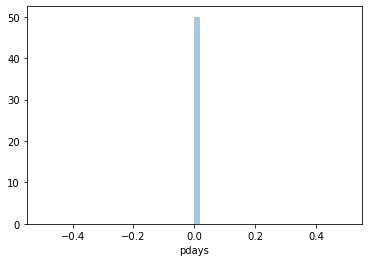

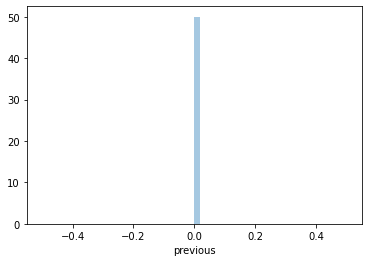

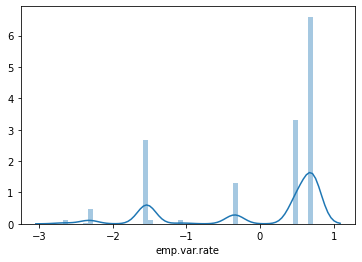

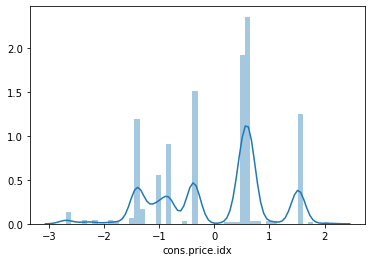

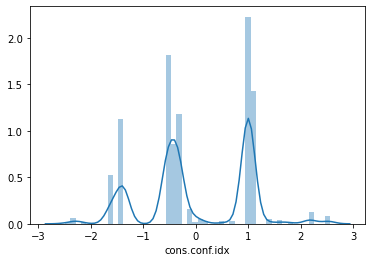

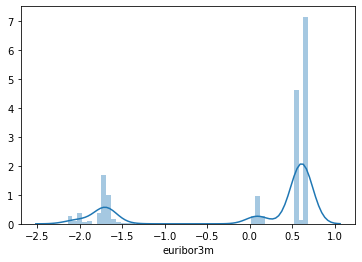

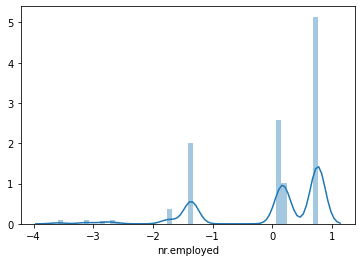

In [24]:
for i,z in enumerate(numeric_col):
    plt.figure(i)
    sns.distplot(data_df[z])

### Statistical Analysis of Categorical Columns

In [19]:
stats_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mode'])
for column in categorical_col.drop('y',axis=1):
    stats_df.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,data_df[column].mode().values[0]]
stats_df

,Count,Missing,Unique,Dtype,Mode
job,32765,0,12,object,admin.
marital,32765,0,4,object,married
education,32765,0,8,object,university.degree
default,32765,0,3,object,no
housing,32765,0,3,object,yes
loan,32765,0,3,object,no
contact,32765,0,2,object,cellular
month,32765,0,10,object,may
day_of_week,32765,0,5,object,mon
poutcome,32765,0,1,object,nonexistent


### Observation
* We have no missing data in the categorical columns
* The various categorical columns had varying number of unique values